In [2]:
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
import IPython.display
from scipy.ndimage import gaussian_filter1d
import pysptk
from scipy.io import wavfile
import warnings
warnings.filterwarnings("ignore")

#### pitch 했던거  F0 pitch 이런식으로 검색하면 나옴 사실이게 기본음잡는거여서 이론적으로 음평가하는데 좋은 접근은아닌듯

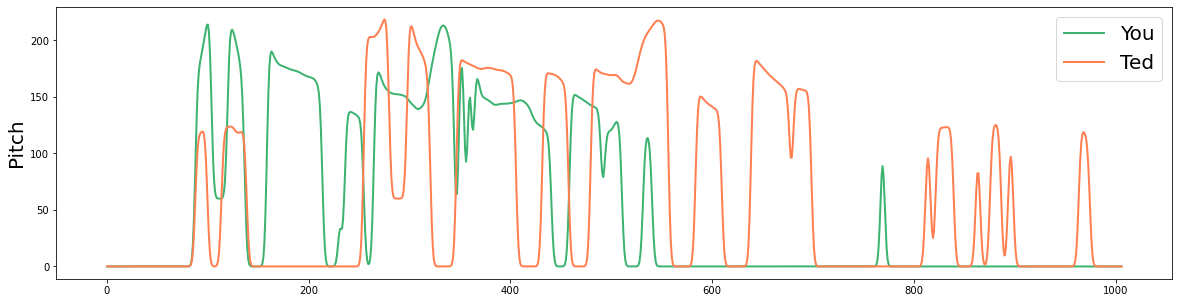

In [7]:
#rcParams['figure.figsize'] = (20, 8)
sr, x = wavfile.read('./ted.wav')
assert sr == 16000
x = x.astype(np.float64)
frame_length = 1024
hop_length = 80
f0 = pysptk.swipe(x.astype(np.float64), fs=sr, hopsize=hop_length, min=60, max=240, otype="f0")
# Note that almost all of pysptk functions assume input array is C-contiguous and np.float64 element type
frames = librosa.util.frame(x, frame_length=frame_length, hop_length=hop_length).astype(np.float64).T

# Windowing
frames *= pysptk.blackman(frame_length)


sr1, x1 = wavfile.read('./me.wav')
assert sr1 == 16000
x1 = x1.astype(np.float64)
frame_length = 1024
hop_length = 80

# Note that almost all of pysptk functions assume input array is C-contiguous and np.float64 element type
frames = librosa.util.frame(x1, frame_length=frame_length, hop_length=hop_length).astype(np.float64).T

# Windowing
frames *= pysptk.blackman(frame_length)

assert frames.shape[1] == frame_length
# F0 estimation
f0_ted= pysptk.swipe(x1.astype(np.float64), fs=sr1, hopsize=hop_length, min=60, max=240, otype="f0")

plt.figure(figsize=(20,5))
##############
assert frames.shape[1] == frame_length
if np.where(f0>=60)[0][0] > np.where(f0_ted>=60)[0][0]: #테드가 왼쪽에서 시작
    diff_f0=np.where(f0>=60)[0][0]-np.where(f0_ted>=60)[0][0]
    zero_f0=np.zeros(diff_f0)
    new_f0=np.r_[zero_f0,f0_ted]
    new_f0=gaussian_filter1d(new_f0, sigma=2)
    you0=np.r_[f0,np.zeros(len(new_f0)-len(f0))]
    you0=gaussian_filter1d(you0, sigma=2)
    #you0=you0*(max(new_f0)/max(you0))
    plt.plot(new_f0,color='mediumseagreen',linewidth=2)
    plt.plot(you0,color='coral',linewidth=2)
    plt.ylabel('Pitch',fontsize=20)
    plt.legend(['Ted','You'],fontsize=20)
else:
    diff_f0_ted=np.where(f0_ted>=60)[0][0]-np.where(f0>=60)[0][0]
    zero_f0_ted=np.zeros(diff_f0_ted)
    new_f0_ted=np.r_[zero_f0_ted,f0]
    new_f0_ted=gaussian_filter1d(new_f0_ted, sigma=2)
    you1=np.r_[f0_ted,np.zeros(len(new_f0_ted)-len(f0_ted))]
    you1=gaussian_filter1d(you1, sigma=2)
    plt.plot(new_f0_ted,color='mediumseagreen',linewidth=2)
    plt.plot(you1,color='coral',linewidth=2)
    plt.ylabel('Pitch',fontsize=20)
    plt.legend(['You','Ted'],fontsize=20)

# 그외 해봤던것들 음평가위해

y혹은 y1에 들어가는것들은 librosa.load 거기서 나오는 y임

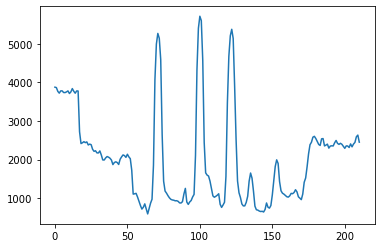

In [12]:
# 스펙트럴 센트로이드 y값에 들어가는건 libros
y1,x =librosa.load("./me.wav")
plt.plot(librosa.feature.spectral_centroid(y1)[0]) # 나 주황색

# roll off  이거는 센트로이드랑 거의 비슷하다고보면됨  이론상

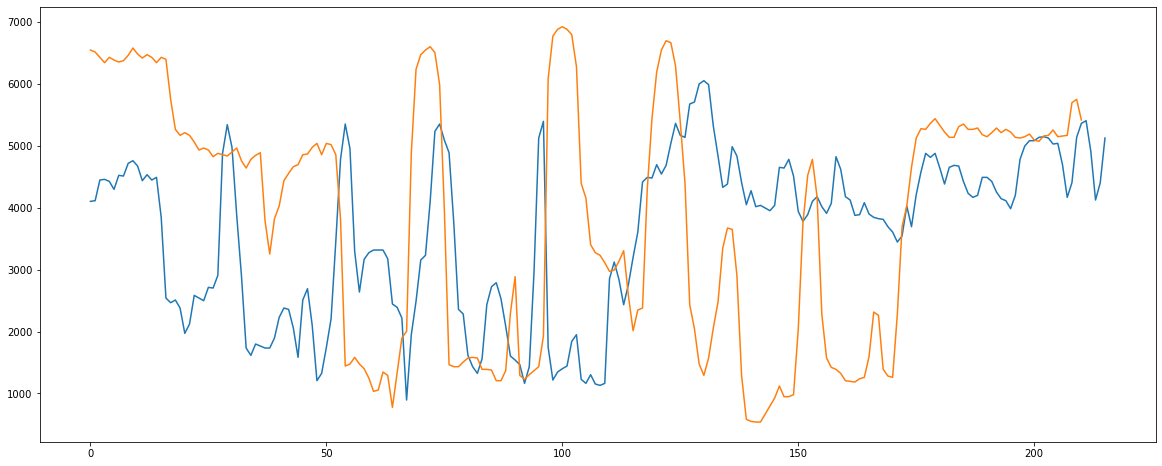

In [27]:
y,x =librosa.load("./ted.wav")

plt.figure(figsize=(20,8))
plt.plot(librosa.feature.spectral_rolloff(y)[0]) # ted
plt.plot(librosa.feature.spectral_rolloff(y1)[0]) # 나 주황색

# flatness 예를들어 모든주파수에 힘이 고르게 있다면 (백색소음같이) 값이 1이나와야됨 이론상 한쪽으로 주파수가 쏠렷다면 0

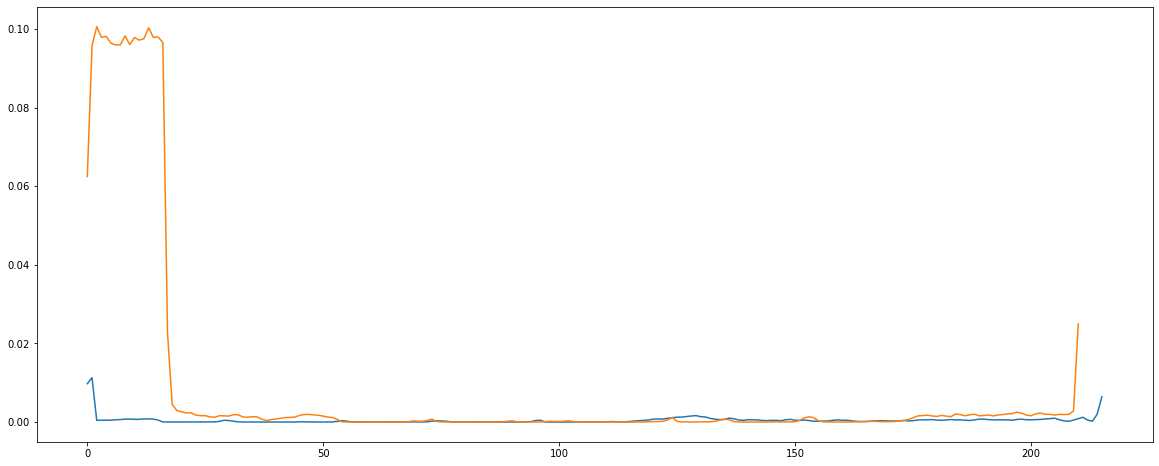

In [14]:
plt.figure(figsize=(20,8))
plt.plot(librosa.feature.spectral_flatness(y)[0]) # ted
plt.plot(librosa.feature.spectral_flatness(y1)[0])

# 크로마 cqt? 그냥 그려봄

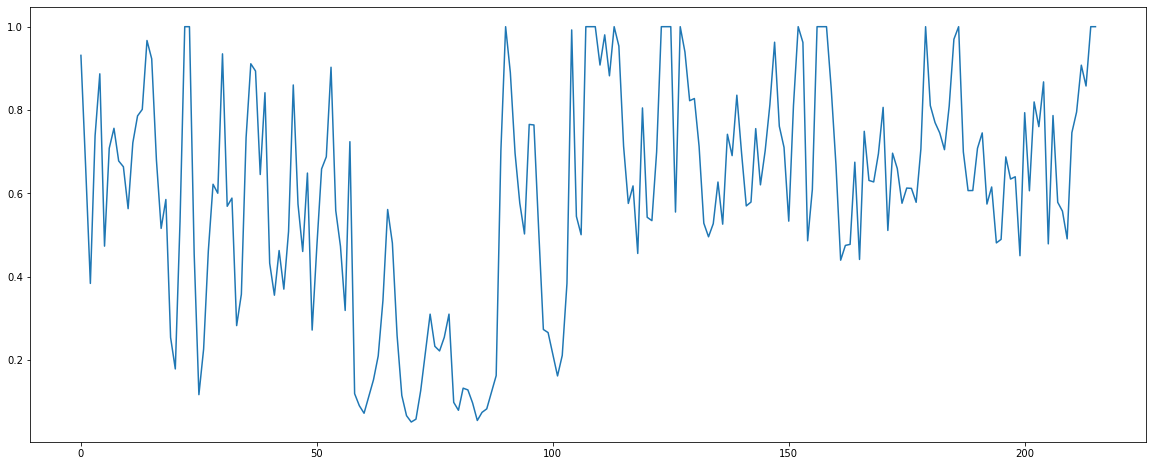

In [15]:
plt.figure(figsize=(20,8))
plt.plot(librosa.feature.chroma_cqt(y)[0]) # ted


# 이것도 걍 그려봄 먼지잘모름 ..

In [16]:
fmin = librosa.midi_to_hz(36)
hop_length = 512
C = librosa.cqt(y, sr=sr, fmin=fmin, n_bins=72, hop_length=hop_length)

In [17]:
import librosa.display

<AxesSubplot:xlabel='Time', ylabel='Note'>

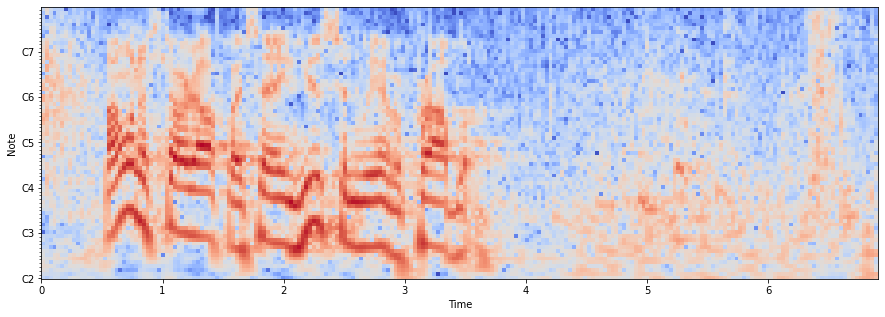

In [18]:
logC = librosa.amplitude_to_db(np.abs(C))
plt.figure(figsize=(15, 5))
librosa.display.specshow(logC, sr=sr, x_axis='time', y_axis='cqt_note', fmin=fmin, cmap='coolwarm')

# 크로마 핏치별로 힘?표시 직접들어보면 빨간부분이 소리가 꺼지는부분같음

<AxesSubplot:xlabel='Time', ylabel='Pitch class'>

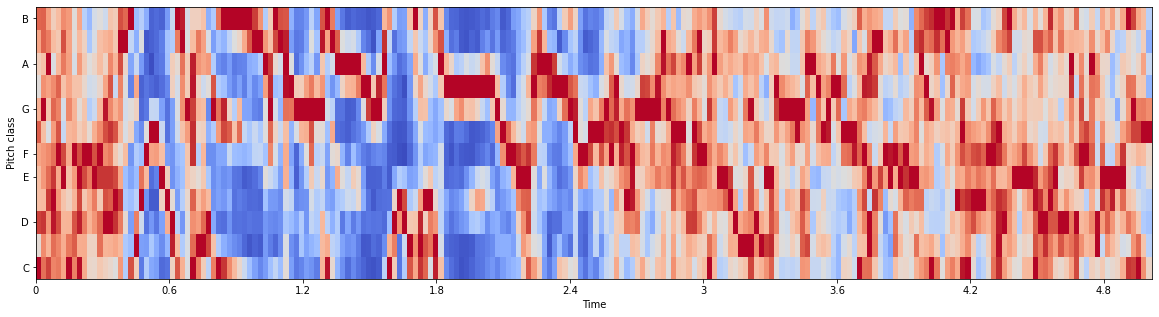

In [19]:
chromagram = librosa.feature.chroma_cqt(y, sr=16000, hop_length=hop_length)
plt.figure(figsize=(20, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

In [45]:
import numpy
filename = librosa.util.example_audio_file()
filename = './ted.wav'
y, sr = librosa.load(filename)
y1, sr1 = librosa.load('./me.wav')
n_fft = 1024
hop_length = 512

spec = numpy.abs(librosa.core.stft(y, n_fft=n_fft, hop_length=hop_length))
spec1 = numpy.abs(librosa.core.stft(y1, n_fft=n_fft, hop_length=hop_length))
freqs = librosa.core.fft_frequencies(n_fft=n_fft)
freqs1 = librosa.core.fft_frequencies(n_fft=n_fft)
times = librosa.core.frames_to_time(spec[0], sr=sr, n_fft=n_fft, hop_length=hop_length)
times1 = librosa.core.frames_to_time(spec[0], sr = sr1, n_fft=n_fft, hop_length=hop_length)

print('spectrogram size', spec.shape, spec1.shape)

fft_bin = 1
time_idx = 1
print('freqs size: ',freqs.shape, freqs1.shape)
print('times size: ',times.shape, times1.shape)
for i in range(513):
    print(i,'freq (Hz):', freqs[i], freqs1[i])
print('time (s)', times[time_idx])
#print('amplitude', spec[fft_bin, time_idx])


spectrogram size (513, 216) (513, 211)
freqs size:  (513,) (513,)
times size:  (216,) (216,)
0 freq (Hz): 0.0 0.0
1 freq (Hz): 21.533203125 21.533203125
2 freq (Hz): 43.06640625 43.06640625
3 freq (Hz): 64.599609375 64.599609375
4 freq (Hz): 86.1328125 86.1328125
5 freq (Hz): 107.666015625 107.666015625
6 freq (Hz): 129.19921875 129.19921875
7 freq (Hz): 150.732421875 150.732421875
8 freq (Hz): 172.265625 172.265625
9 freq (Hz): 193.798828125 193.798828125
10 freq (Hz): 215.33203125 215.33203125
11 freq (Hz): 236.865234375 236.865234375
12 freq (Hz): 258.3984375 258.3984375
13 freq (Hz): 279.931640625 279.931640625
14 freq (Hz): 301.46484375 301.46484375
15 freq (Hz): 322.998046875 322.998046875
16 freq (Hz): 344.53125 344.53125
17 freq (Hz): 366.064453125 366.064453125
18 freq (Hz): 387.59765625 387.59765625
19 freq (Hz): 409.130859375 409.130859375
20 freq (Hz): 430.6640625 430.6640625
21 freq (Hz): 452.197265625 452.197265625
22 freq (Hz): 473.73046875 473.73046875
23 freq (Hz): 495